# **1. Perkenalan Dataset**


Dataset yang digunakan pada eksperimen ini adalah Students Performance in Exams, yang berasal dari platform Kaggle.

Dataset ini berisi informasi mengenai performa siswa dalam tiga mata pelajaran utama, yaitu Math, Reading, dan Writing. Selain itu, dataset juga menyediakan beberapa fitur demografis dan latar belakang siswa seperti:

gender

race/ethnicity

parental level of education

lunch type

test preparation course

Dataset ini sering digunakan untuk memprediksi nilai ujian siswa berdasarkan atribut-atribut tersebut. Pada proyek ini, dataset akan digunakan sebagai dasar untuk melakukan eksplorasi data, preprocessing, dan pembuatan model machine learning yang sesuai.

Sumber dataset:
https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
url = 'https://drive.google.com/uc?export=download&id=1hTtfUWxInbwM6swnoVw_HwNq4-o0ujJy'
df = pd.read_csv(url)

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [5]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
df.shape

(1000, 8)

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

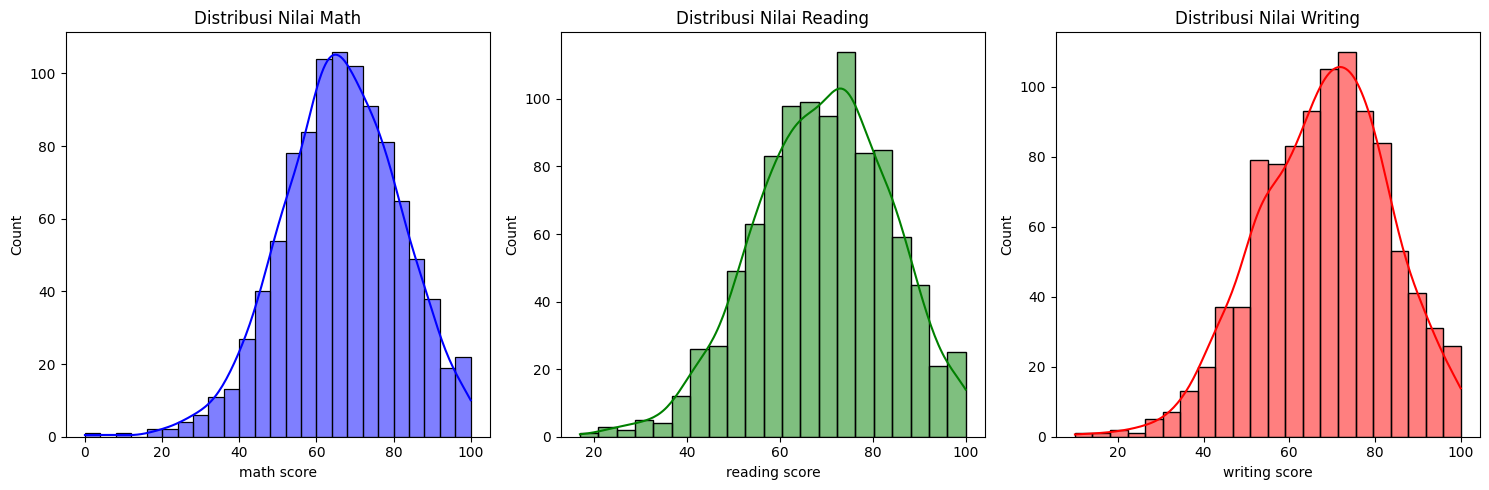

In [7]:
plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
sns.histplot(df['math score'], kde=True, color='blue')
plt.title('Distribusi Nilai Math')

plt.subplot(1, 3, 2)
sns.histplot(df['reading score'], kde=True, color='green')
plt.title('Distribusi Nilai Reading')

plt.subplot(1, 3, 3)
sns.histplot(df['writing score'], kde=True, color='red')
plt.title('Distribusi Nilai Writing')

plt.tight_layout()
plt.show()

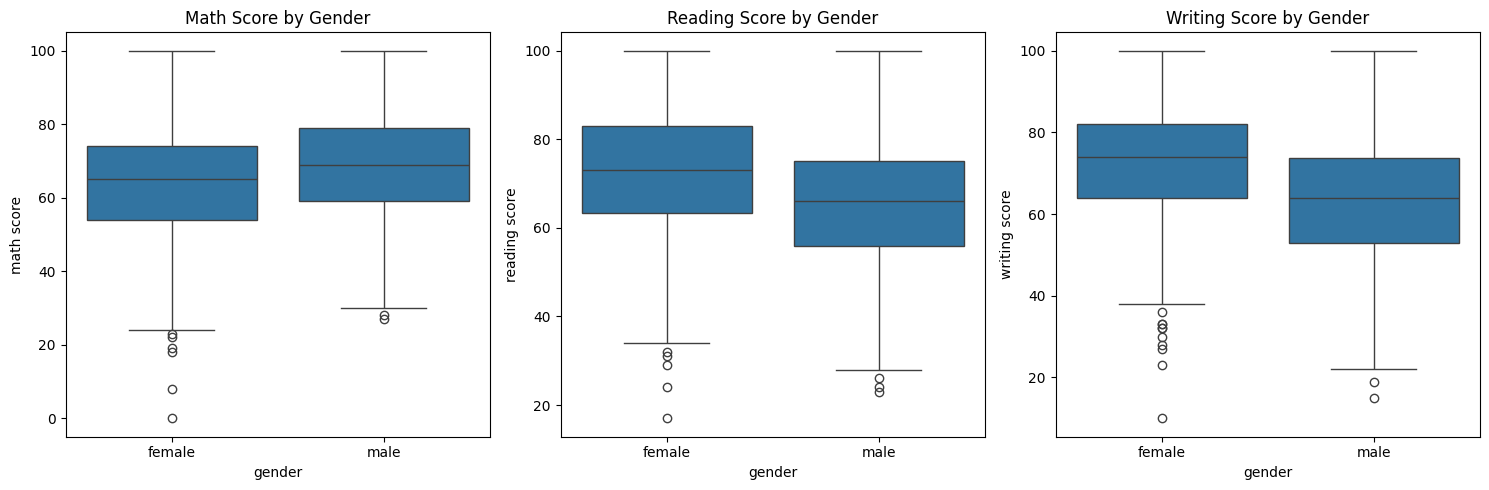

In [8]:
plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
sns.boxplot(data=df, x='gender', y='math score')
plt.title('Math Score by Gender')

plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='gender', y='reading score')
plt.title('Reading Score by Gender')

plt.subplot(1, 3, 3)
sns.boxplot(data=df, x='gender', y='writing score')
plt.title('Writing Score by Gender')

plt.tight_layout()
plt.show()

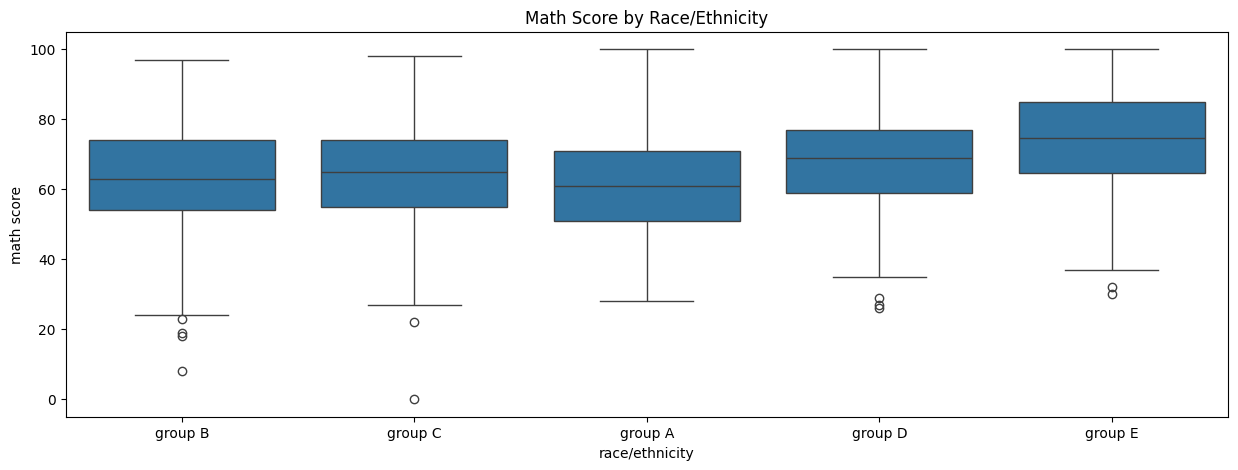

In [9]:
plt.figure(figsize=(15,5))

sns.boxplot(data=df, x='race/ethnicity', y='math score')
plt.title("Math Score by Race/Ethnicity")
plt.show()

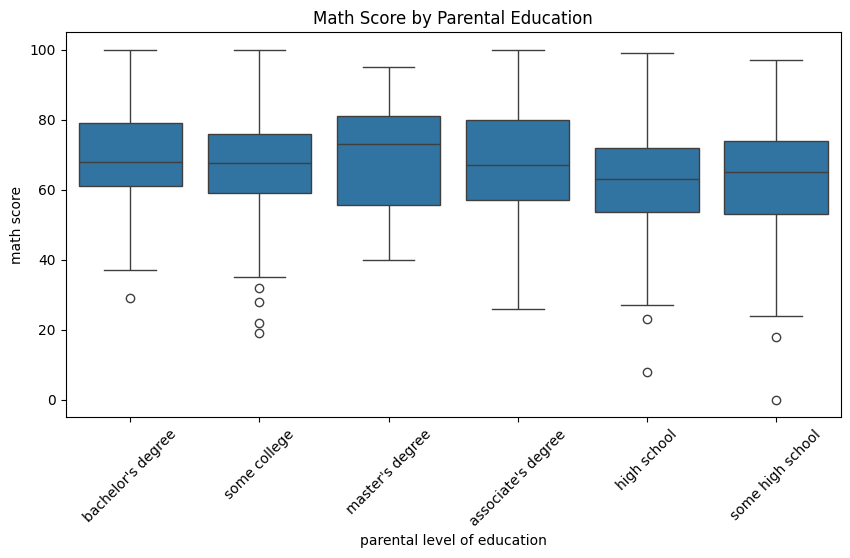

In [10]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='parental level of education', y='math score')
plt.xticks(rotation=45)
plt.title("Math Score by Parental Education")
plt.show()

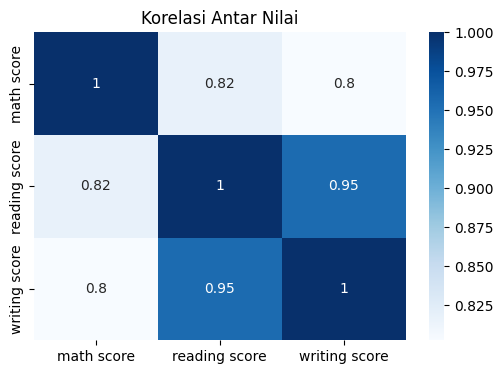

In [11]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['math score','reading score','writing score']].corr(), annot=True, cmap='Blues')
plt.title("Korelasi Antar Nilai")
plt.show()

In [12]:
df['gender'].value_counts()

,count
gender,
female,518
male,482


In [13]:
df['race/ethnicity'].value_counts()

,count
race/ethnicity,
group C,319
group D,262
group B,190
group E,140
group A,89


In [14]:
df['parental level of education'].value_counts()

,count
parental level of education,
some college,226
associate's degree,222
high school,196
some high school,179
bachelor's degree,118
master's degree,59


In [15]:
df['test preparation course'].value_counts()

,count
test preparation course,
none,642
completed,358


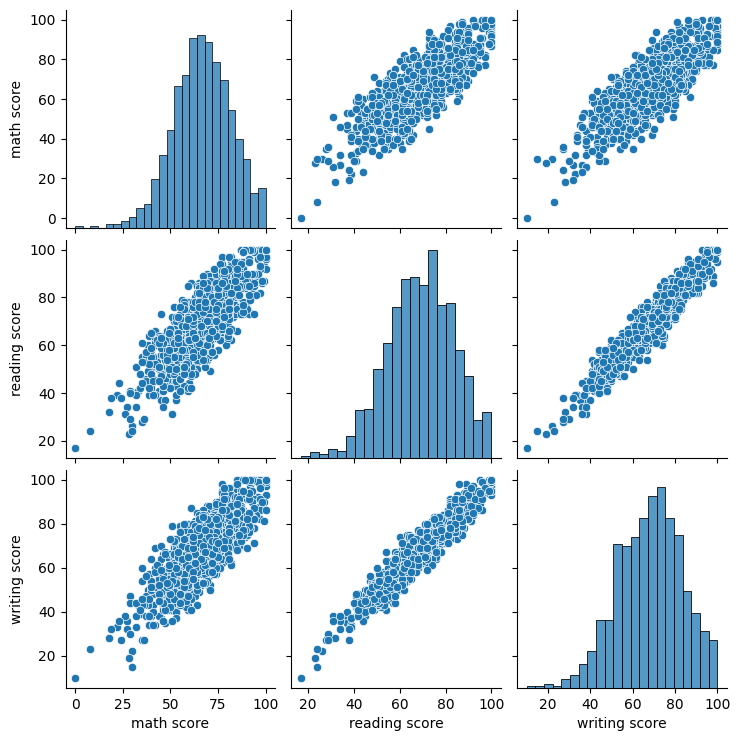

In [16]:
sns.pairplot(df[['math score','reading score','writing score']])
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [17]:
print("Jumlah missing values tiap kolom:")
print(df.isnull().sum())
print("\nJumlah duplikat:", df.duplicated().sum())

Jumlah missing values tiap kolom:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Jumlah duplikat: 0


In [18]:
df = df.drop_duplicates().reset_index(drop=True)

print("Shape data setelah menghapus duplikat:", df.shape)

Shape data setelah menghapus duplikat: (1000, 8)


In [19]:
target_col = 'math score'

X = df.drop(columns=[target_col])
y = df[target_col]

print("Fitur (X) shape:", X.shape)
print("Target (y) shape:", y.shape)

Fitur (X) shape: (1000, 7)
Target (y) shape: (1000,)


In [20]:
numeric_cols = ['reading score', 'writing score']

categorical_cols = [col for col in X.columns if col not in numeric_cols]

print("Kolom numerik:", numeric_cols)
print("Kolom kategorikal:", categorical_cols)

Kolom numerik: ['reading score', 'writing score']
Kolom kategorikal: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [21]:
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

print("Shape sebelum encoding:", X.shape)
print("Shape setelah encoding:", X_encoded.shape)
X_encoded.head()

Shape sebelum encoding: (1000, 7)
Shape setelah encoding: (1000, 14)


,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,72,74,False,True,False,False,False,True,False,False,False,False,True,True
1,90,88,False,False,True,False,False,False,False,False,True,False,True,False
2,95,93,False,True,False,False,False,False,False,True,False,False,True,True
3,57,44,True,False,False,False,False,False,False,False,False,False,False,True
4,78,75,True,False,True,False,False,False,False,False,True,False,True,True


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.2,
    random_state=42
)

print("X_train:", X_train.shape)
print("X_test :", X_test.shape)
print("y_train:", y_train.shape)
print("y_test :", y_test.shape)

X_train: (800, 14)
X_test : (200, 14)
y_train: (800,)
y_test : (200,)


In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])

X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

X_train[numeric_cols].head()

,reading score,writing score
29,0.030791,0.434053
535,0.930290,0.964701
695,1.345443,1.163694
557,-0.176786,-0.162925
836,-0.384363,-0.759904


In [24]:
import os

df_processed = X_encoded.copy()
df_processed[target_col] = y

print("Shape dataset final:", df_processed.shape)
df_processed.head()

Shape dataset final: (1000, 15)


,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none,math score
0,72,74,False,True,False,False,False,True,False,False,False,False,True,True,72
1,90,88,False,False,True,False,False,False,False,False,True,False,True,False,69
2,95,93,False,True,False,False,False,False,False,True,False,False,True,True,90
3,57,44,True,False,False,False,False,False,False,False,False,False,False,True,47
4,78,75,True,False,True,False,False,False,False,False,True,False,True,True,76


In [25]:
output_dir = "/content/namadataset_preprocessing"
os.makedirs(output_dir, exist_ok=True)

output_path = os.path.join(output_dir, "students_performance_preprocessed.csv")

df_processed.to_csv(output_path, index=False)

print("Dataset hasil preprocessing disimpan di:", output_path)

Dataset hasil preprocessing disimpan di: /content/namadataset_preprocessing/students_performance_preprocessed.csv


In [26]:
!zip -r sample_data.zip sample_data

  adding: sample_data/ (stored 0%)
  adding: sample_data/README.md (deflated 39%)
  adding: sample_data/anscombe.json (deflated 83%)
  adding: sample_data/mnist_train_small.csv (deflated 88%)
  adding: sample_data/california_housing_test.csv (deflated 76%)
  adding: sample_data/mnist_test.csv (deflated 88%)
  adding: sample_data/california_housing_train.csv (deflated 79%)
